## Description:

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Acknowledgements:

This dataset has been referred from Kaggle: https://www.kaggle.com/c/titanic/data.

## About Dataset

The Titanic Passenger dataset provides information about passengers who were aboard the RMS Titanic during its ill-fated maiden voyage. This dataset is often used for exploring patterns and factors associated with survival on the Titanic.

The dataset includes the following columns:

PassengerId: Unique identifier for each passenger.

Survived: Survival status of the passenger (0 = Not Survived, 1 = Survived).

Pclass: Passenger class (1 = First class, 2 = Second class, 3 = Third class).

Sex: Gender of the passenger.

Age: Age of the passenger.

SibSp: Number of siblings/spouses aboard the Titanic.

Parch: Number of parents/children aboard the Titanic.

Fare: Fare paid by the passenger.

Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

## Objective:

Understand the Dataset & cleanup (if required).

Build a strong classification model to predict whether the passenger survives or not.

Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

In [271]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix

## 1. Load the Dataset

In [272]:
# Import the data
df = pd.read_csv("titanic.data.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [273]:
# lets get the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [274]:
# Lets drop the unwanted columns, because it causes the noise in the workflow
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [275]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [276]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Sex', ylabel='count'>

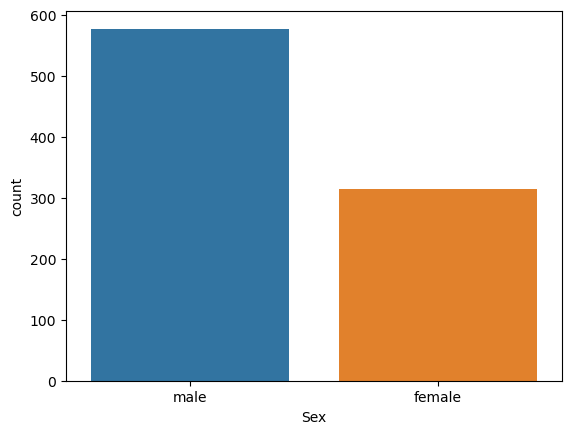

In [277]:
# Lets make a vizualization for Sex column
sns.countplot(x = df['Sex'], data=df)

<Axes: xlabel='Survived', ylabel='count'>

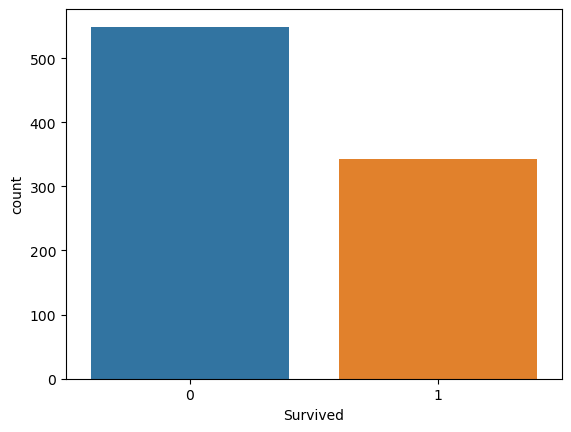

In [278]:
# Lets visualize form survived people
sns.countplot(x=df.Survived, data=df)

In [279]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [280]:
df = df.replace({'Sex':{'male':1, 'female':0}})
df = df.replace({'Embarked':{'S':0, 'C':1, 'Q':2}})

In [281]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0.0
887,1,1,0,19.0,0,0,30.0000,0.0
888,0,3,0,NaN,1,2,23.4500,0.0
889,1,1,1,26.0,0,0,30.0000,1.0


In [282]:
# Show pie chart of survival rate
survived_counts = df['Survived'].value_counts().reset_index()
survived_counts.columns = ['Survived', 'Count']
fig = px.pie(survived_counts, values='Count', names=['No', 'Yes'], title='Survived', labels={'Count': 'Count'}, color = ['No', 'Yes'])
fig.update_traces(textposition='inside',  textinfo='percent+label+value')
fig.update_layout(uniformtext_minsize=14, uniformtext_mode='hide')
fig.show()

In [283]:
#Lets check the null values are present are not
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [284]:
# Lets remove the null values from the data
imputer = KNNImputer(n_neighbors=2)
imputed_data = imputer.fit_transform(df)
df_imputed = pd.DataFrame(imputed_data, columns=df.columns)

In [285]:
df_imputed

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,1.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,0.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,0.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0.0,2.0,1.0,27.0,0.0,0.0,13.0000,0.0
887,1.0,1.0,0.0,19.0,0.0,0.0,30.0000,0.0
888,0.0,3.0,0.0,20.0,1.0,2.0,23.4500,0.0
889,1.0,1.0,1.0,26.0,0.0,0.0,30.0000,1.0


In [286]:
df_imputed.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [287]:
# Lets check the survived people coording to the age
pd.crosstab(df.Survived, df.Age)

Age,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,...,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
Survived,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,2,7,1,3,0,...,2,0,2,3,1,2,1,2,1,0
1,1,1,2,2,1,5,3,5,7,4,...,2,2,0,0,0,0,0,0,0,1


In [288]:
print("Unique values in Survived: {}".format(df.Survived.unique()))
print("Unique values in Pclass: {}".format(df.Pclass.unique()))
print("Unique values in Sex: {}".format(df.Sex.unique()))
print(f"Unique values in SibSp: {df.SibSp.unique()}")
print(f"Unique values in Parch: {df.Parch.unique()}")

Unique values in Survived: [0 1]
Unique values in Pclass: [3 1 2]
Unique values in Sex: [1 0]
Unique values in SibSp: [1 0 3 4 2 5 8]
Unique values in Parch: [0 1 2 5 3 4 6]


<Axes: >

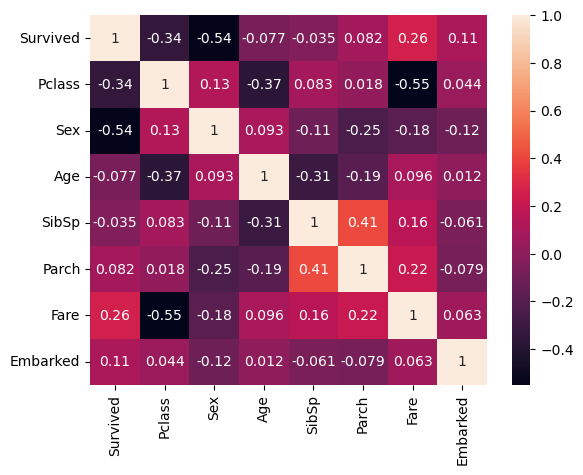

In [289]:
# Lets make a correlation matrix to check the relation between coefficients
sns.heatmap(df.corr(), annot=True)

In [290]:
df_imputed

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,1.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,0.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,0.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0.0,2.0,1.0,27.0,0.0,0.0,13.0000,0.0
887,1.0,1.0,0.0,19.0,0.0,0.0,30.0000,0.0
888,0.0,3.0,0.0,20.0,1.0,2.0,23.4500,0.0
889,1.0,1.0,1.0,26.0,0.0,0.0,30.0000,1.0


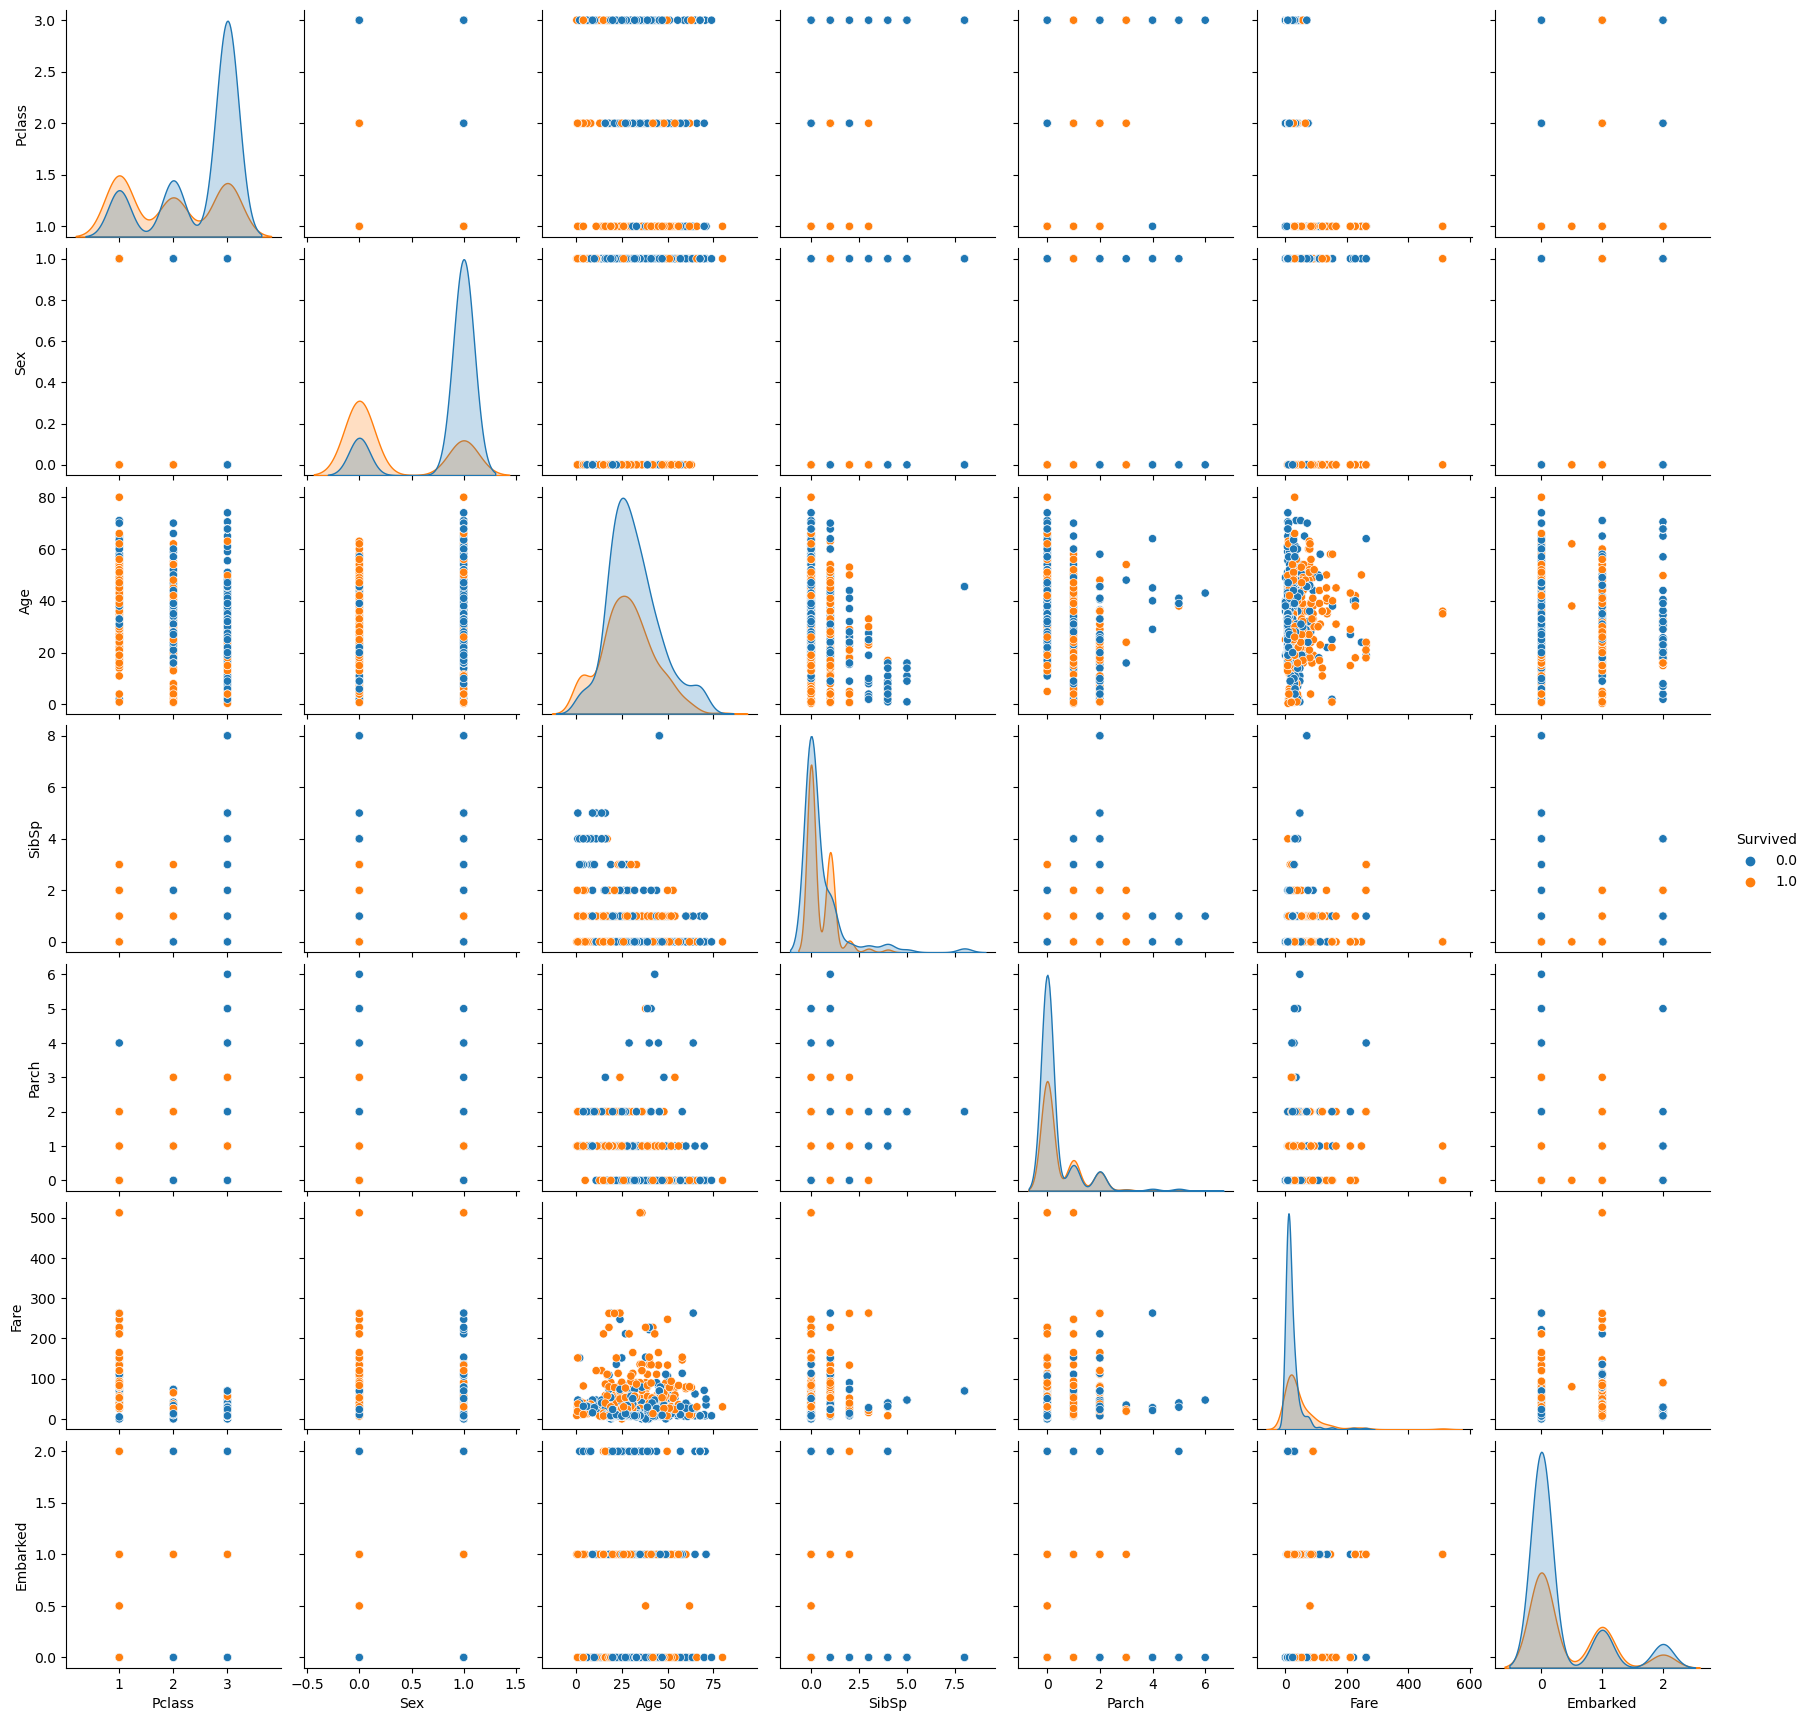

In [291]:
#Understanding the relationship between all the features
sns.pairplot(df_imputed, hue='Survived')

In [292]:
# Lets split the data into x & y
x = df_imputed.drop('Survived', axis=1)
y = df_imputed["Survived"]

In [293]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0
1,1.0,0.0,38.0,1.0,0.0,71.2833,1.0
2,3.0,0.0,26.0,0.0,0.0,7.9250,0.0
3,1.0,0.0,35.0,1.0,0.0,53.1000,0.0
4,3.0,1.0,35.0,0.0,0.0,8.0500,0.0
...,...,...,...,...,...,...,...
886,2.0,1.0,27.0,0.0,0.0,13.0000,0.0
887,1.0,0.0,19.0,0.0,0.0,30.0000,0.0
888,3.0,0.0,20.0,1.0,2.0,23.4500,0.0
889,1.0,1.0,26.0,0.0,0.0,30.0000,1.0


In [294]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [295]:
# Lets train and test the dataset
x_train, x_test, y_train, y_test = train_test_split(x,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42)

In [296]:
# Lets the fit the data into the model
from sklearn.svm import SVC
models = {"RF":RandomForestClassifier(),
          "KNN":KNeighborsClassifier(),
          "SVM":SVC(),
          "LR":LogisticRegression(),
          "ABC":AdaBoostClassifier(),
          "GBC":GradientBoostingClassifier()
    
}

# Lets create a function 
def fit_and_score(models, x_train, x_test, y_train, y_test):

    # Lets make random seed.
    np.random.seed(42)

    # Lets create a empty dictionary
    model_scores = {}

    for name, model in models.items():
        
        # Lets fit the training data
        model.fit(x_train, y_train)
        
        # lets fit the test data
        model_scores[name] = model.score(x_test, y_test)
        
    return model_scores
        

In [297]:
import warnings
warnings.filterwarnings('ignore')
model_scores = fit_and_score(models=models,
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

{'RF': 0.8715083798882681,
 'KNN': 0.7541899441340782,
 'SVM': 0.664804469273743,
 'LR': 0.8100558659217877,
 'ABC': 0.7821229050279329,
 'GBC': 0.8324022346368715}

# Hyperparameter tuning

In [298]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1.0,1.0,45.5,0.0,0.0,28.5000,0.0
733,2.0,1.0,23.0,0.0,0.0,13.0000,0.0
382,3.0,1.0,32.0,0.0,0.0,7.9250,0.0
704,3.0,1.0,26.0,1.0,0.0,7.8542,0.0
813,3.0,0.0,6.0,4.0,2.0,31.2750,0.0
...,...,...,...,...,...,...,...
106,3.0,0.0,21.0,0.0,0.0,7.6500,0.0
270,1.0,1.0,42.0,0.0,0.0,31.0000,0.0
860,3.0,1.0,41.0,2.0,0.0,14.1083,0.0
435,1.0,0.0,14.0,1.0,2.0,120.0000,0.0


In [300]:
%%time
# create a hyperparameter grid for RanodmForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3,5,10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}
# Tune RandomForestClassifier

np.random.seed(42)


# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit the hyperparameter search model for RandomForestClassifier
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 1min 7s
Wall time: 1min 17s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [301]:
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [302]:
# evaluate the randomizedsearch for RandomForestClassifier models.
rs_rf.score(x_test, y_test)

0.8212290502793296

In [304]:
# different hyperparameters for our LogisticRegression model.
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter search model.
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [305]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [306]:
# Evaluate the grid Search LogisticRegression model
gs_log_reg.score(x_test, y_test)

0.7877094972067039

In [307]:
model_scores

{'RF': 0.8715083798882681,
 'KNN': 0.7541899441340782,
 'SVM': 0.664804469273743,
 'LR': 0.8100558659217877,
 'ABC': 0.7821229050279329,
 'GBC': 0.8324022346368715}

In [308]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)

In [309]:
# confusion matrix
print(confusion_matrix(y_test, y_preds))

[[90 15]
 [23 51]]


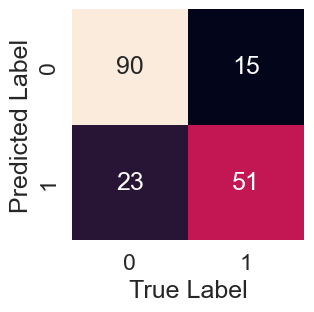

In [310]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborns's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
    #bottom, top = ax.get_ylim()
    ##ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

In [311]:
# Lets make a classificaion report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       105
         1.0       0.77      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



In [314]:
# create a new classifier with best parameters
clf = LogisticRegression(C = 0.20433597178569418,
                        solver="liblinear")

In [326]:
# Cross-validated accuracy
from sklearn.model_selection import cross_val_score
cv_acc = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc.mean()

0.7946079969870065

In [327]:
# cross-validated Precision
cv_pre = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="precision")
cv_pre.mean()

0.7678034567292549

In [328]:
# Cross-validated Recall
cv_rec = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="recall")
cv_rec.mean()

0.666624040920716

In [329]:
#Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1.mean()

0.713291645544939